# Import libraries and Data collection

In [482]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [483]:
df = pd.read_csv("hmeq_Loan_Default.csv")
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


# Data Preprocessing

In [484]:
# rows and columns
df.shape

(5960, 13)

In [485]:
df.size

77480

In [486]:
df.columns

Index(['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG',
       'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC'],
      dtype='object')

In [487]:
# Data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   BAD      5960 non-null   int64  
 1   LOAN     5960 non-null   int64  
 2   MORTDUE  5442 non-null   float64
 3   VALUE    5848 non-null   float64
 4   REASON   5708 non-null   object 
 5   JOB      5681 non-null   object 
 6   YOJ      5445 non-null   float64
 7   DEROG    5252 non-null   float64
 8   DELINQ   5380 non-null   float64
 9   CLAGE    5652 non-null   float64
 10  NINQ     5450 non-null   float64
 11  CLNO     5738 non-null   float64
 12  DEBTINC  4693 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [488]:
# Checking for null values
df.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [489]:
# Checking the percentage of missing values in each column
df.isnull().sum()/df.shape[0]*100

BAD         0.000000
LOAN        0.000000
MORTDUE     8.691275
VALUE       1.879195
REASON      4.228188
JOB         4.681208
YOJ         8.640940
DEROG      11.879195
DELINQ      9.731544
CLAGE       5.167785
NINQ        8.557047
CLNO        3.724832
DEBTINC    21.258389
dtype: float64

In [490]:
# checking for duplicates
# There are no duplicates
df.duplicated().sum()

0

# Statistics Summary

In [491]:
# From this description, looking at the min and max, there are outliers. 
# There a larger outliers in the Loan, mortgage and value. It means some people collected large loans.
df.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915
std,0.399656,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031
50%,0.000000,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141
max,1.000000,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149


In [492]:
df.describe(include='object').T

,count,unique,top,freq
REASON,5708,2,DebtCon,3928
JOB,5681,6,Other,2388


In [493]:
# checking the count of unique values
# 68% of the reason for collecting loans are for debt consolidation(paying off other liabilities and consumer debts)
cols = df.select_dtypes(['object'])

for i in cols.columns:
    print(f"Unique values in {i} are: ")
    print(f"{df[i].value_counts(normalize = True)}")

Unique values in REASON are: 
REASON
DebtCon    0.688157
HomeImp    0.311843
Name: proportion, dtype: float64
Unique values in JOB are: 
JOB
Other      0.420349
ProfExe    0.224608
Office     0.166872
Mgr        0.135011
Self       0.033973
Sales      0.019187
Name: proportion, dtype: float64


In [494]:
# 80% of clients are non-defaulted in paying their loans.
df['BAD'].value_counts()

BAD
0    4771
1    1189
Name: count, dtype: int64

# Exploratory Data Analysis

In [495]:
# A function that will helps create boxplot and histogram for any input numericalvariable.
def histo_box(feature, figsize=(15, 10)):
    f2, (ax_box2, ax_hist2) = plt.subplots(nrows = 2, # Number of rows of the subplot grid= 2
                                           sharex = True, # x-axis will be shared among all subplots
                                           figsize = figsize 
                                           ) # creating the 2 subplots
    sns.boxplot(feature, ax=ax_box2, color = 'violet')
    sns.histplot(feature, ax=ax_hist2)

In [496]:
df.columns

Index(['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'REASON', 'JOB', 'YOJ', 'DEROG',
       'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC'],
      dtype='object')

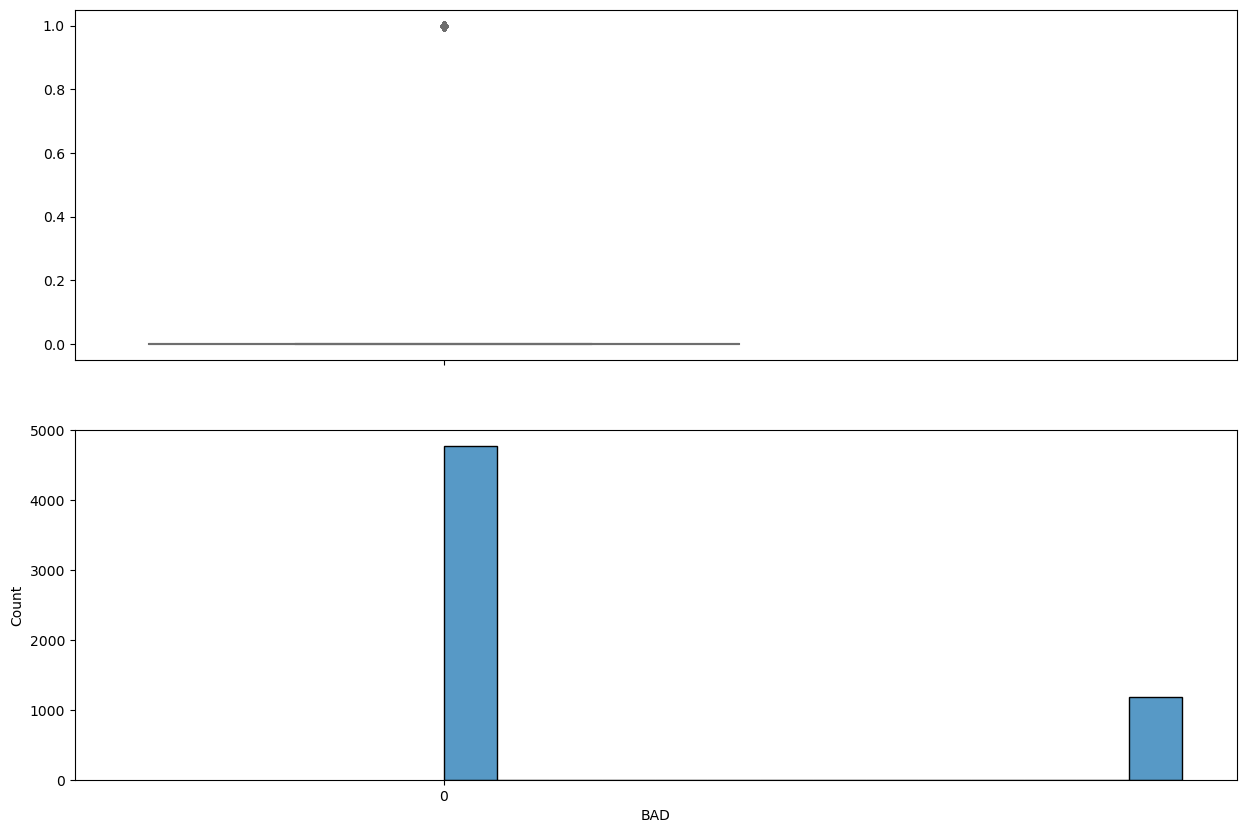

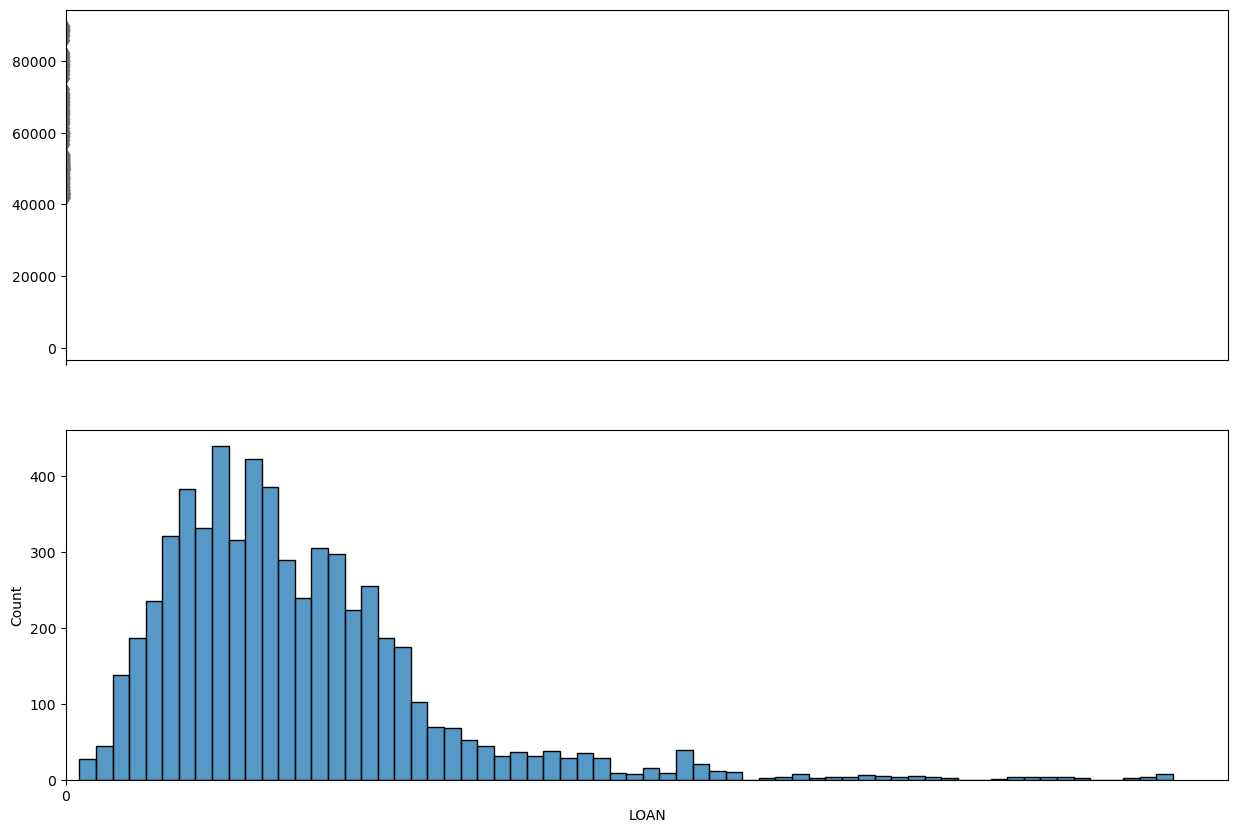

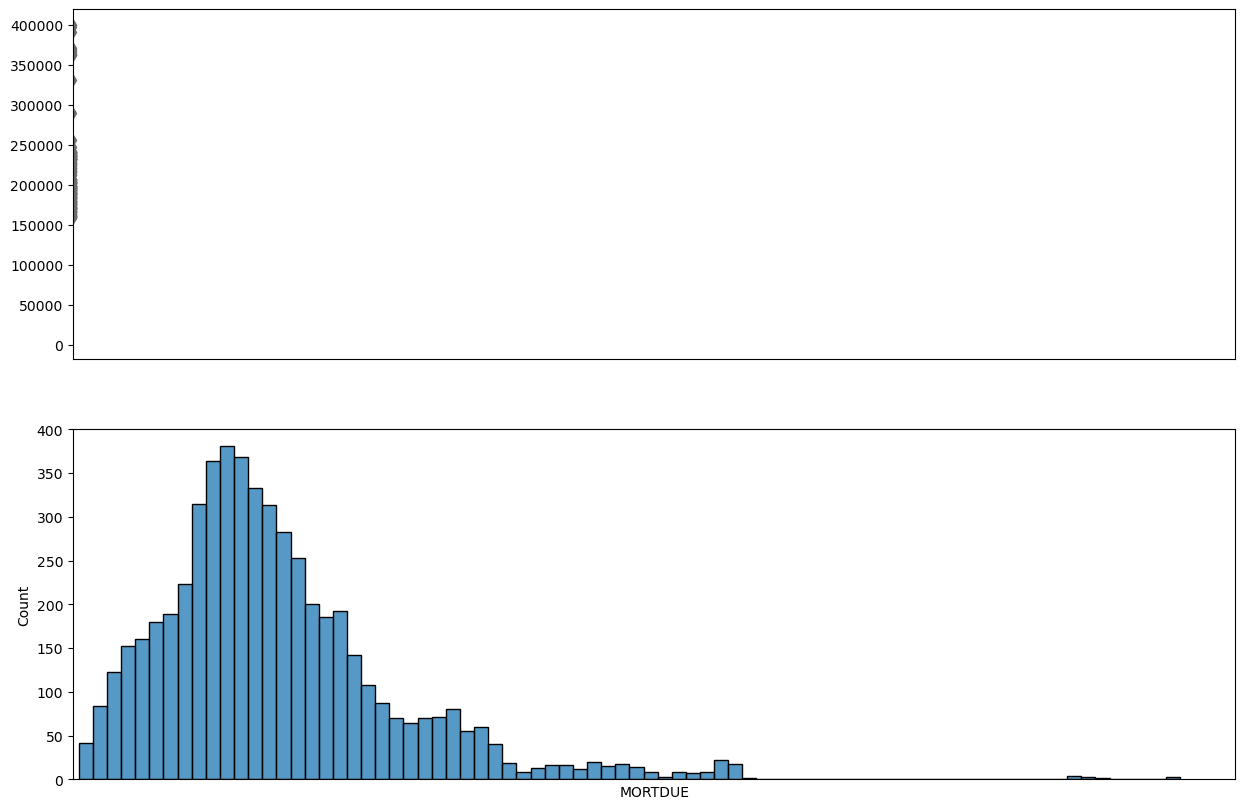

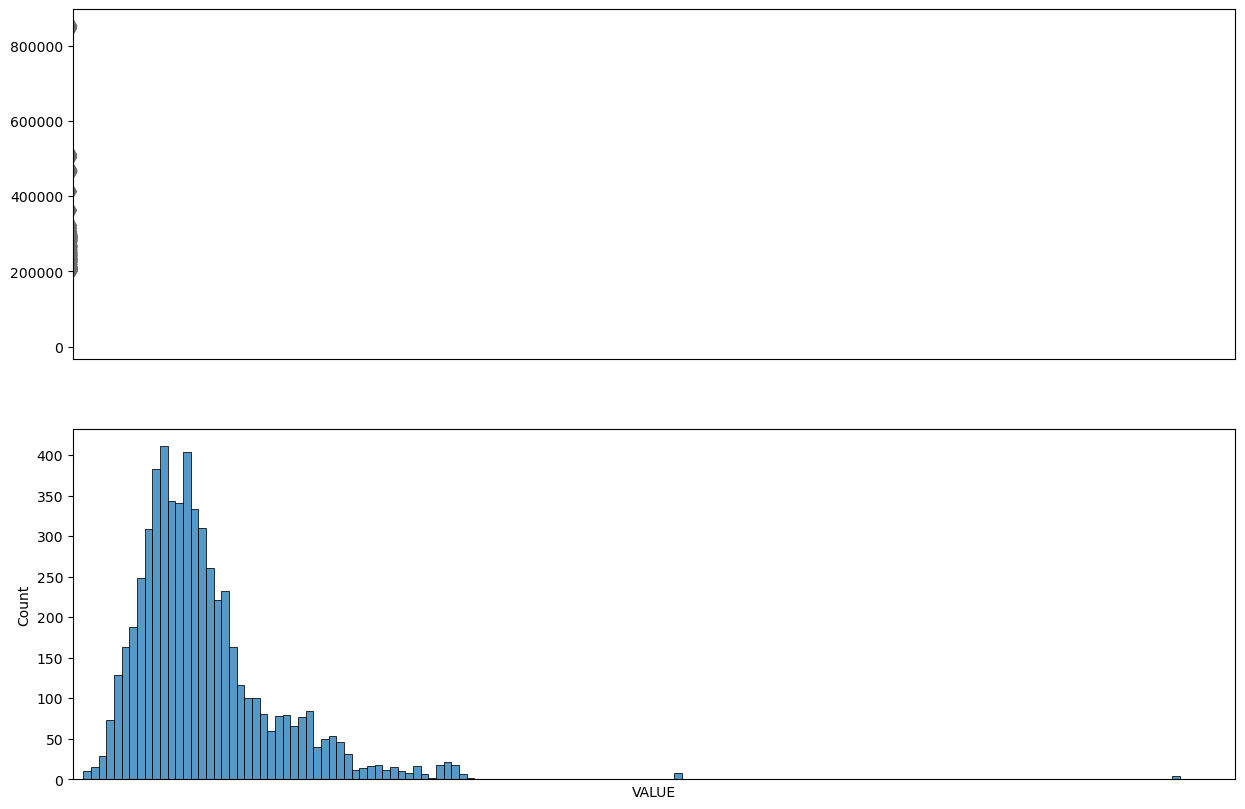

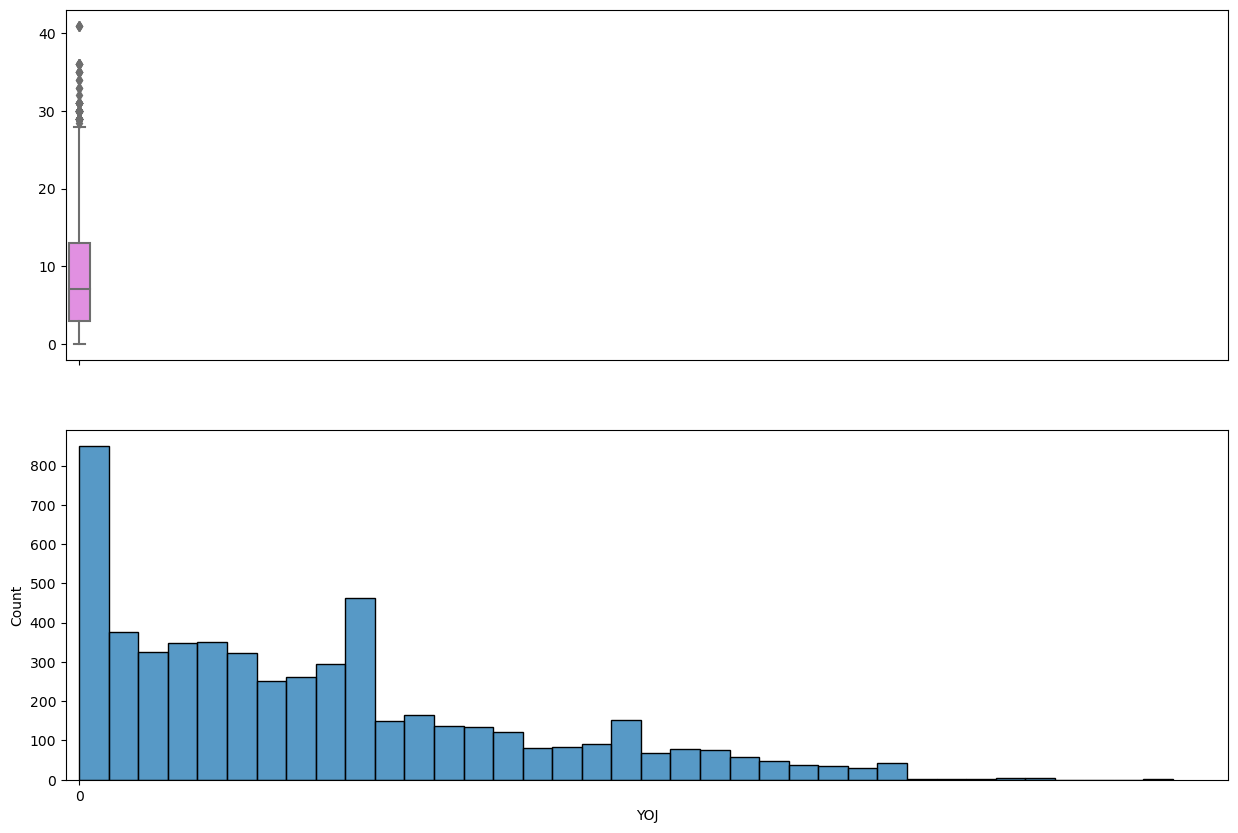

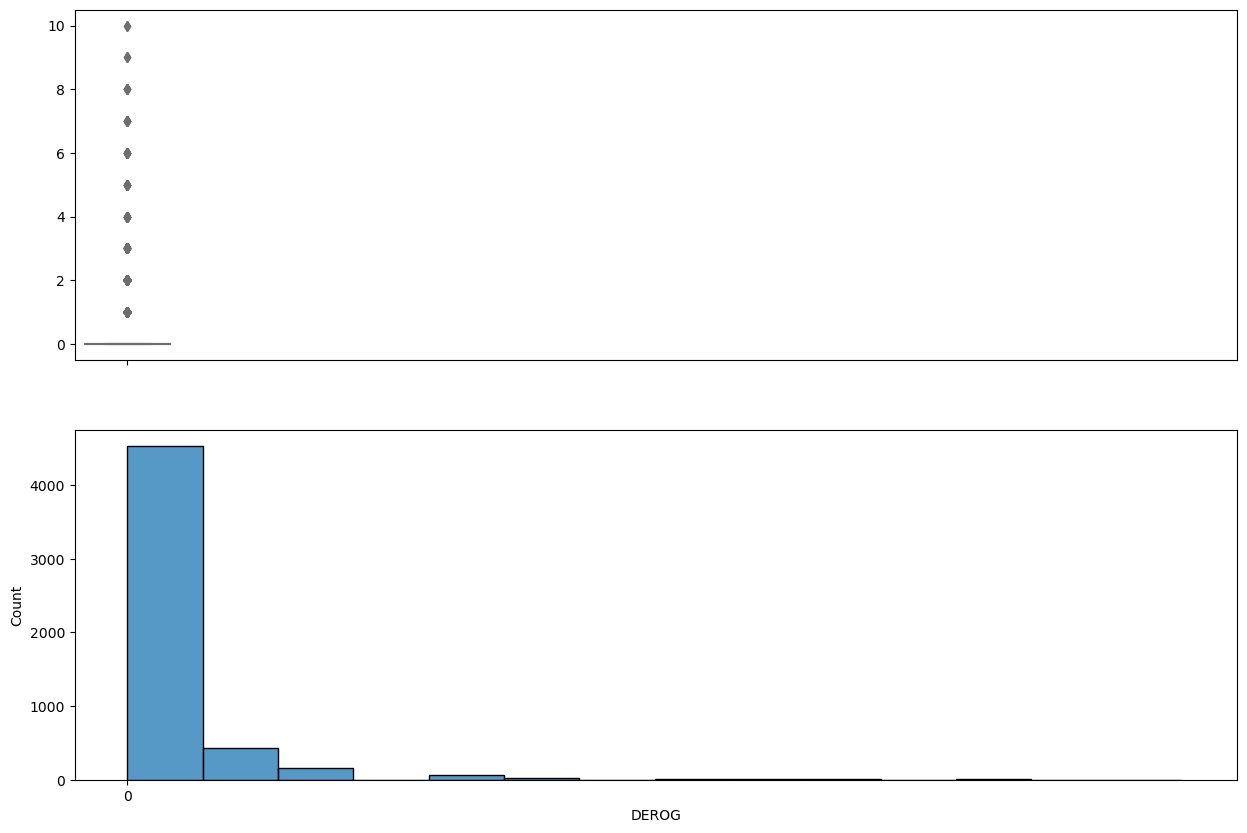

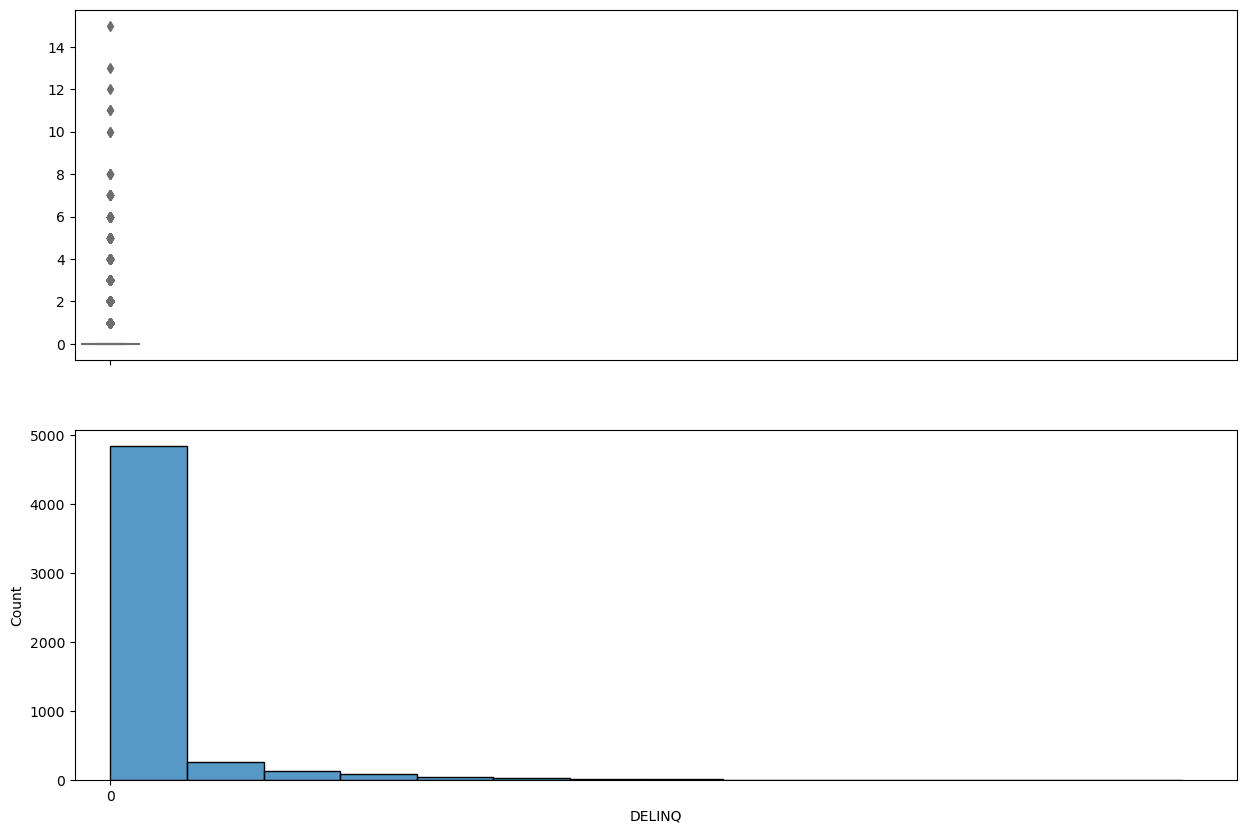

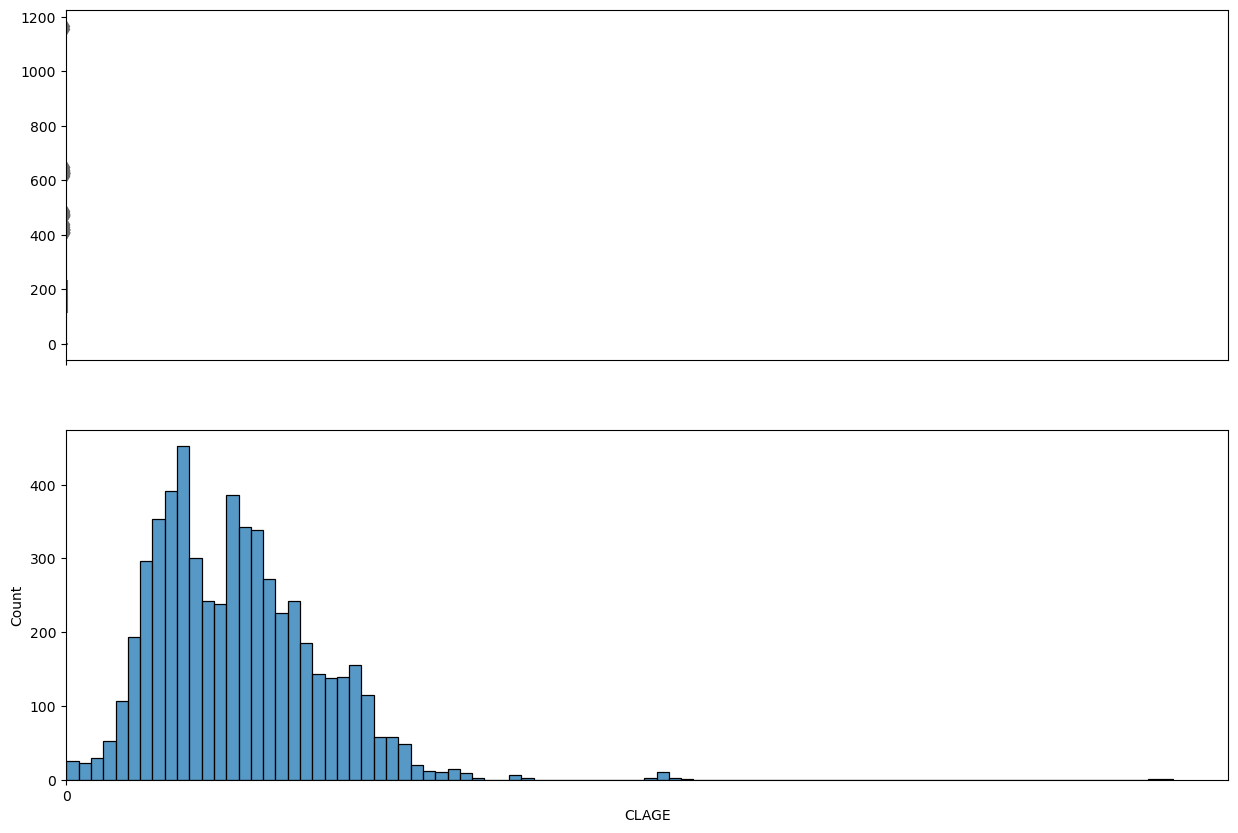

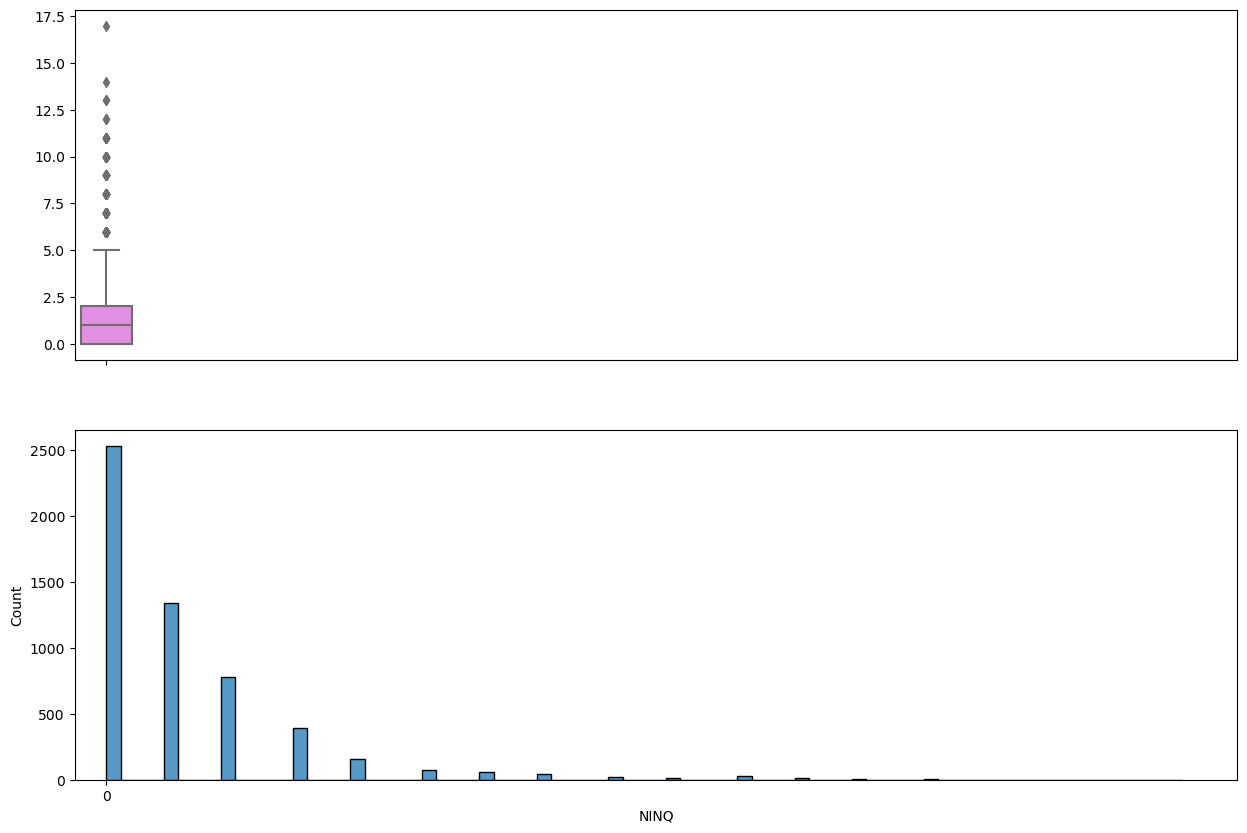

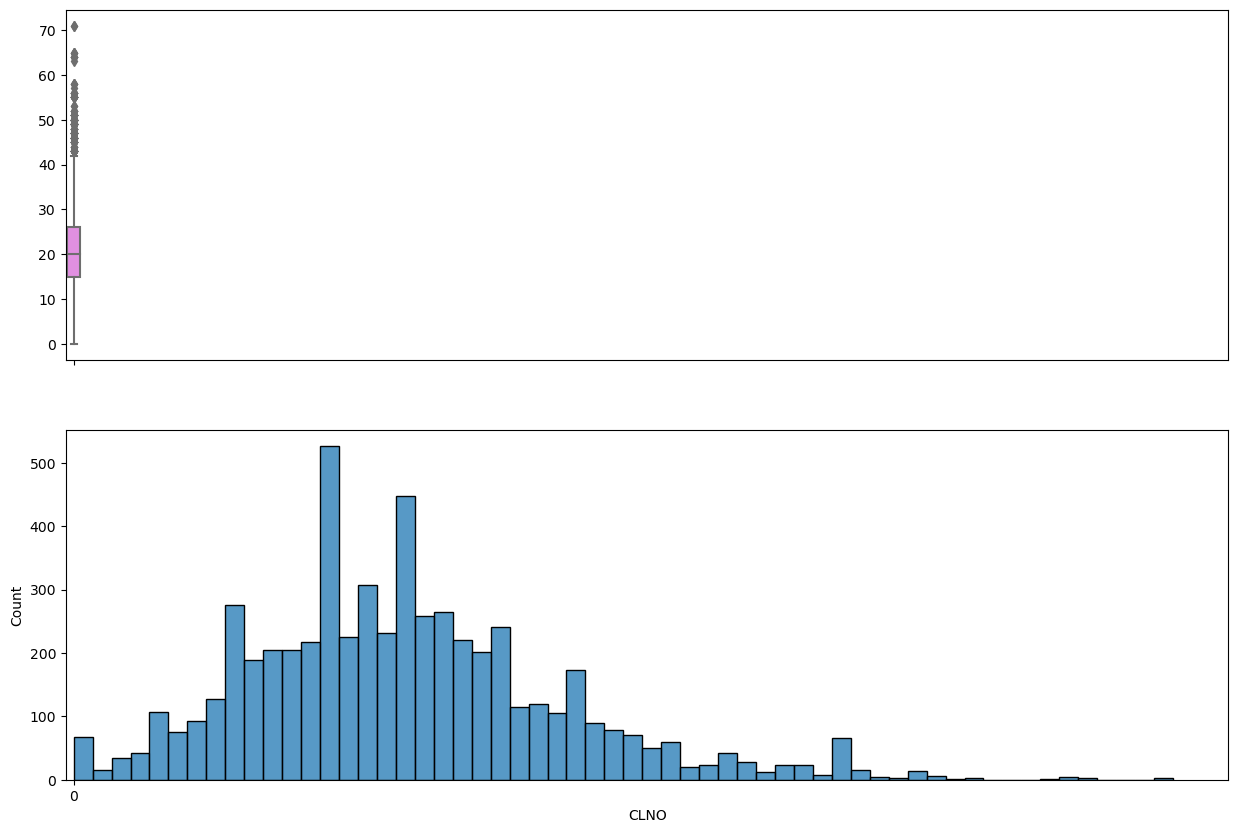

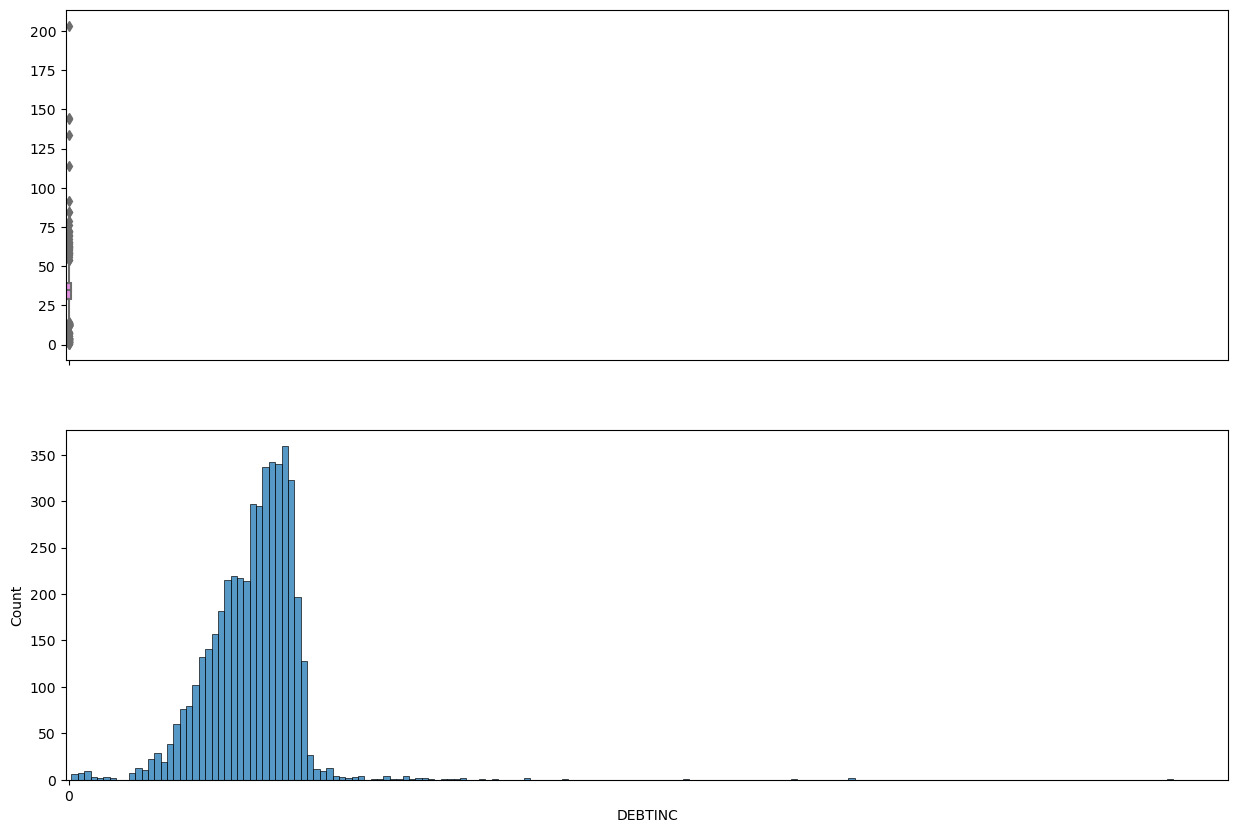

In [497]:
# Some of the columns are skewed, some have outliers like the DEROG column.
num_col = ['BAD', 'LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG',
       'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']
for i in num_col:
    histo_box(df[i])

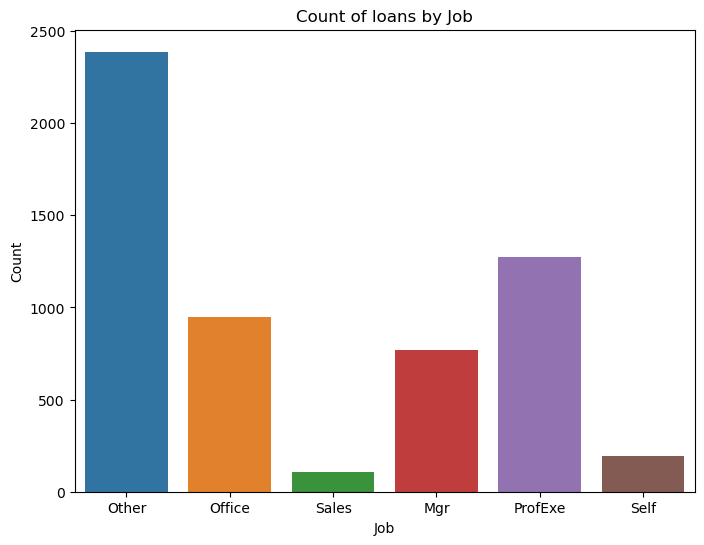

In [498]:
# Bar plot
plt.figure(figsize=(8, 6))
sns.countplot(x='JOB', data = df)
plt.title("Count of loans by Job")
plt.xlabel('Job')
plt.ylabel('Count')
plt.show()

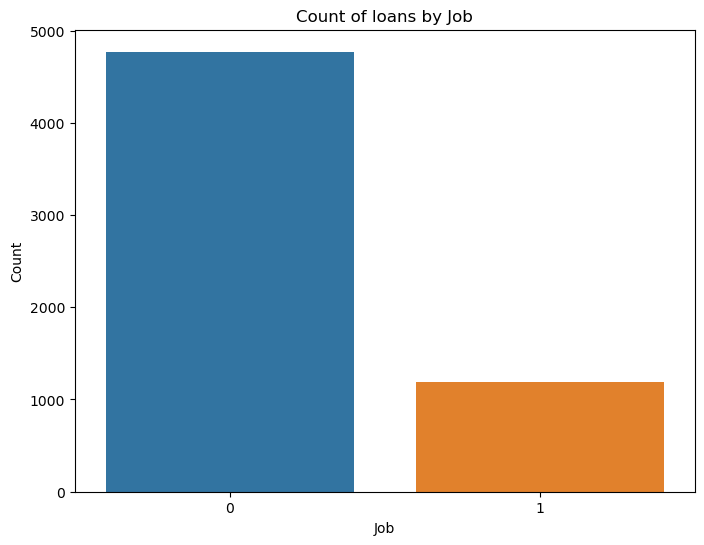

In [499]:
# Bar plot
plt.figure(figsize=(8, 6))
sns.countplot(x='BAD', data = df)
plt.title("Count of loans by Job")
plt.xlabel('Job')
plt.ylabel('Count')
plt.show()

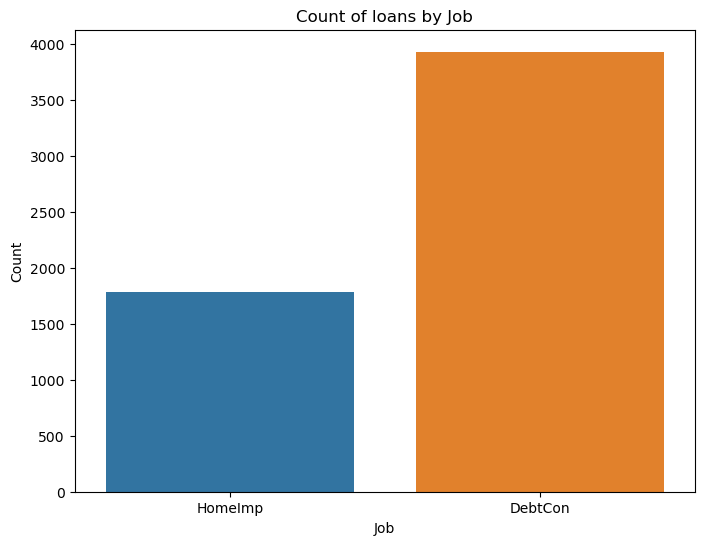

In [500]:
# Bar plot
plt.figure(figsize=(8, 6))
sns.countplot(x='REASON', data = df)
plt.title("Count of loans by Job")
plt.xlabel('Job')
plt.ylabel('Count')
plt.show()

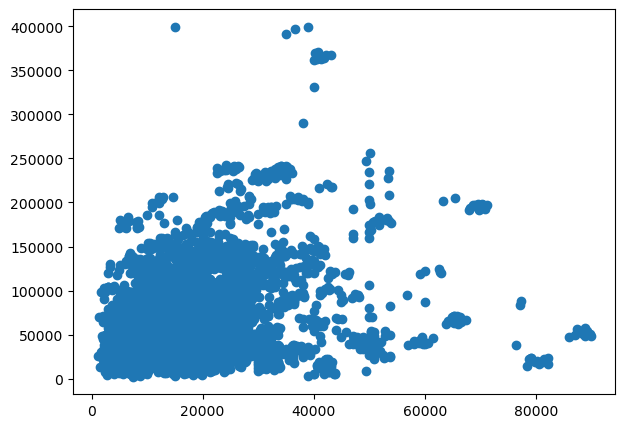

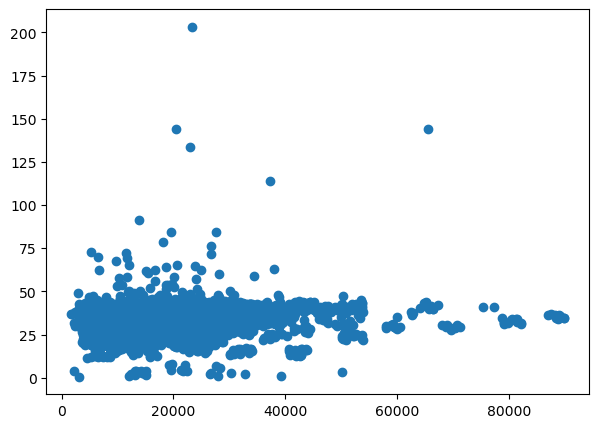

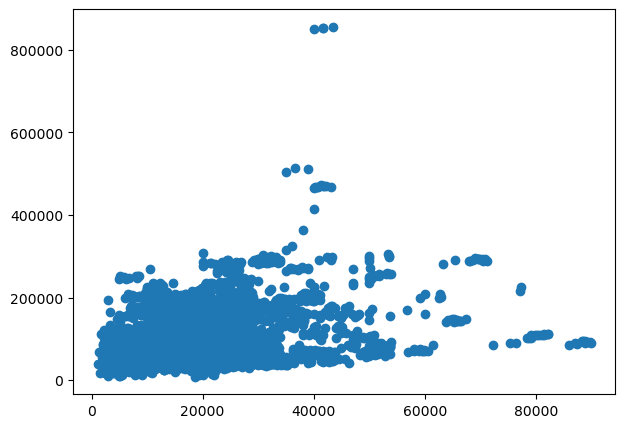

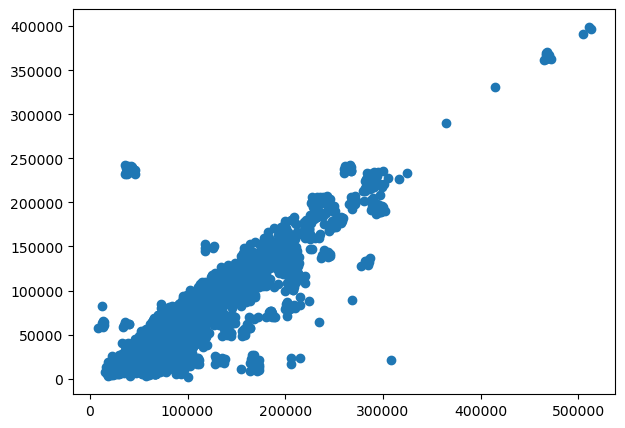

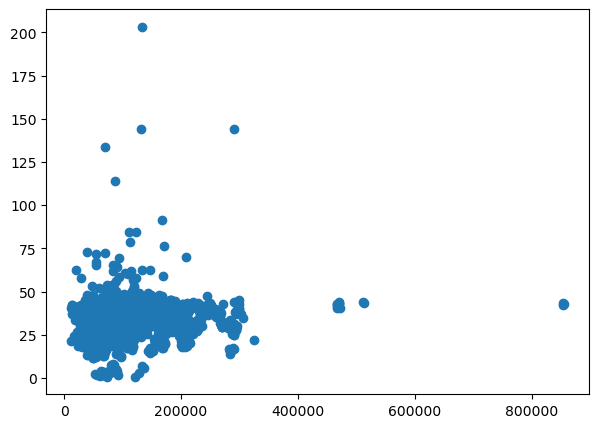

In [501]:
# Scatter plot for numeric variables against the target variable
# There is a linear correlation between VALUE and MORTDUE
plt.figure(figsize=(7,5))
plt.scatter(df["LOAN"],df['MORTDUE'])
plt.figure(figsize=(7,5))
plt.scatter(df["LOAN"],df['DEBTINC'])
plt.figure(figsize=(7,5))
plt.scatter(df["LOAN"],df['VALUE'])
plt.figure(figsize=(7,5))
plt.scatter(df["VALUE"],df['MORTDUE'])
plt.figure(figsize=(7,5))
plt.scatter(df["VALUE"],df['DEBTINC'])

In [502]:
# # Checking the correlation between the features
# df[num_col].corr()

<Axes: >

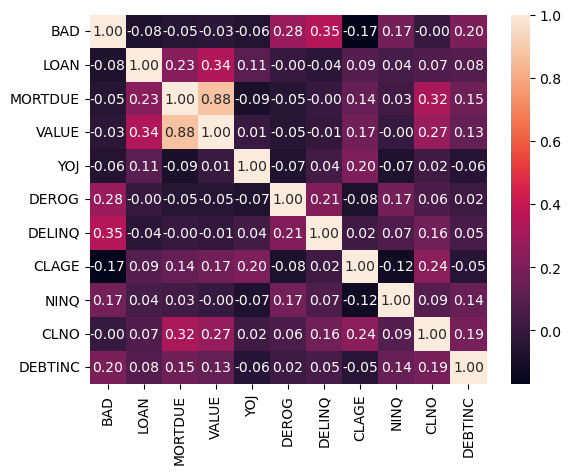

In [503]:
sns.heatmap(df[num_col].corr(), annot = True, fmt = '.2f')

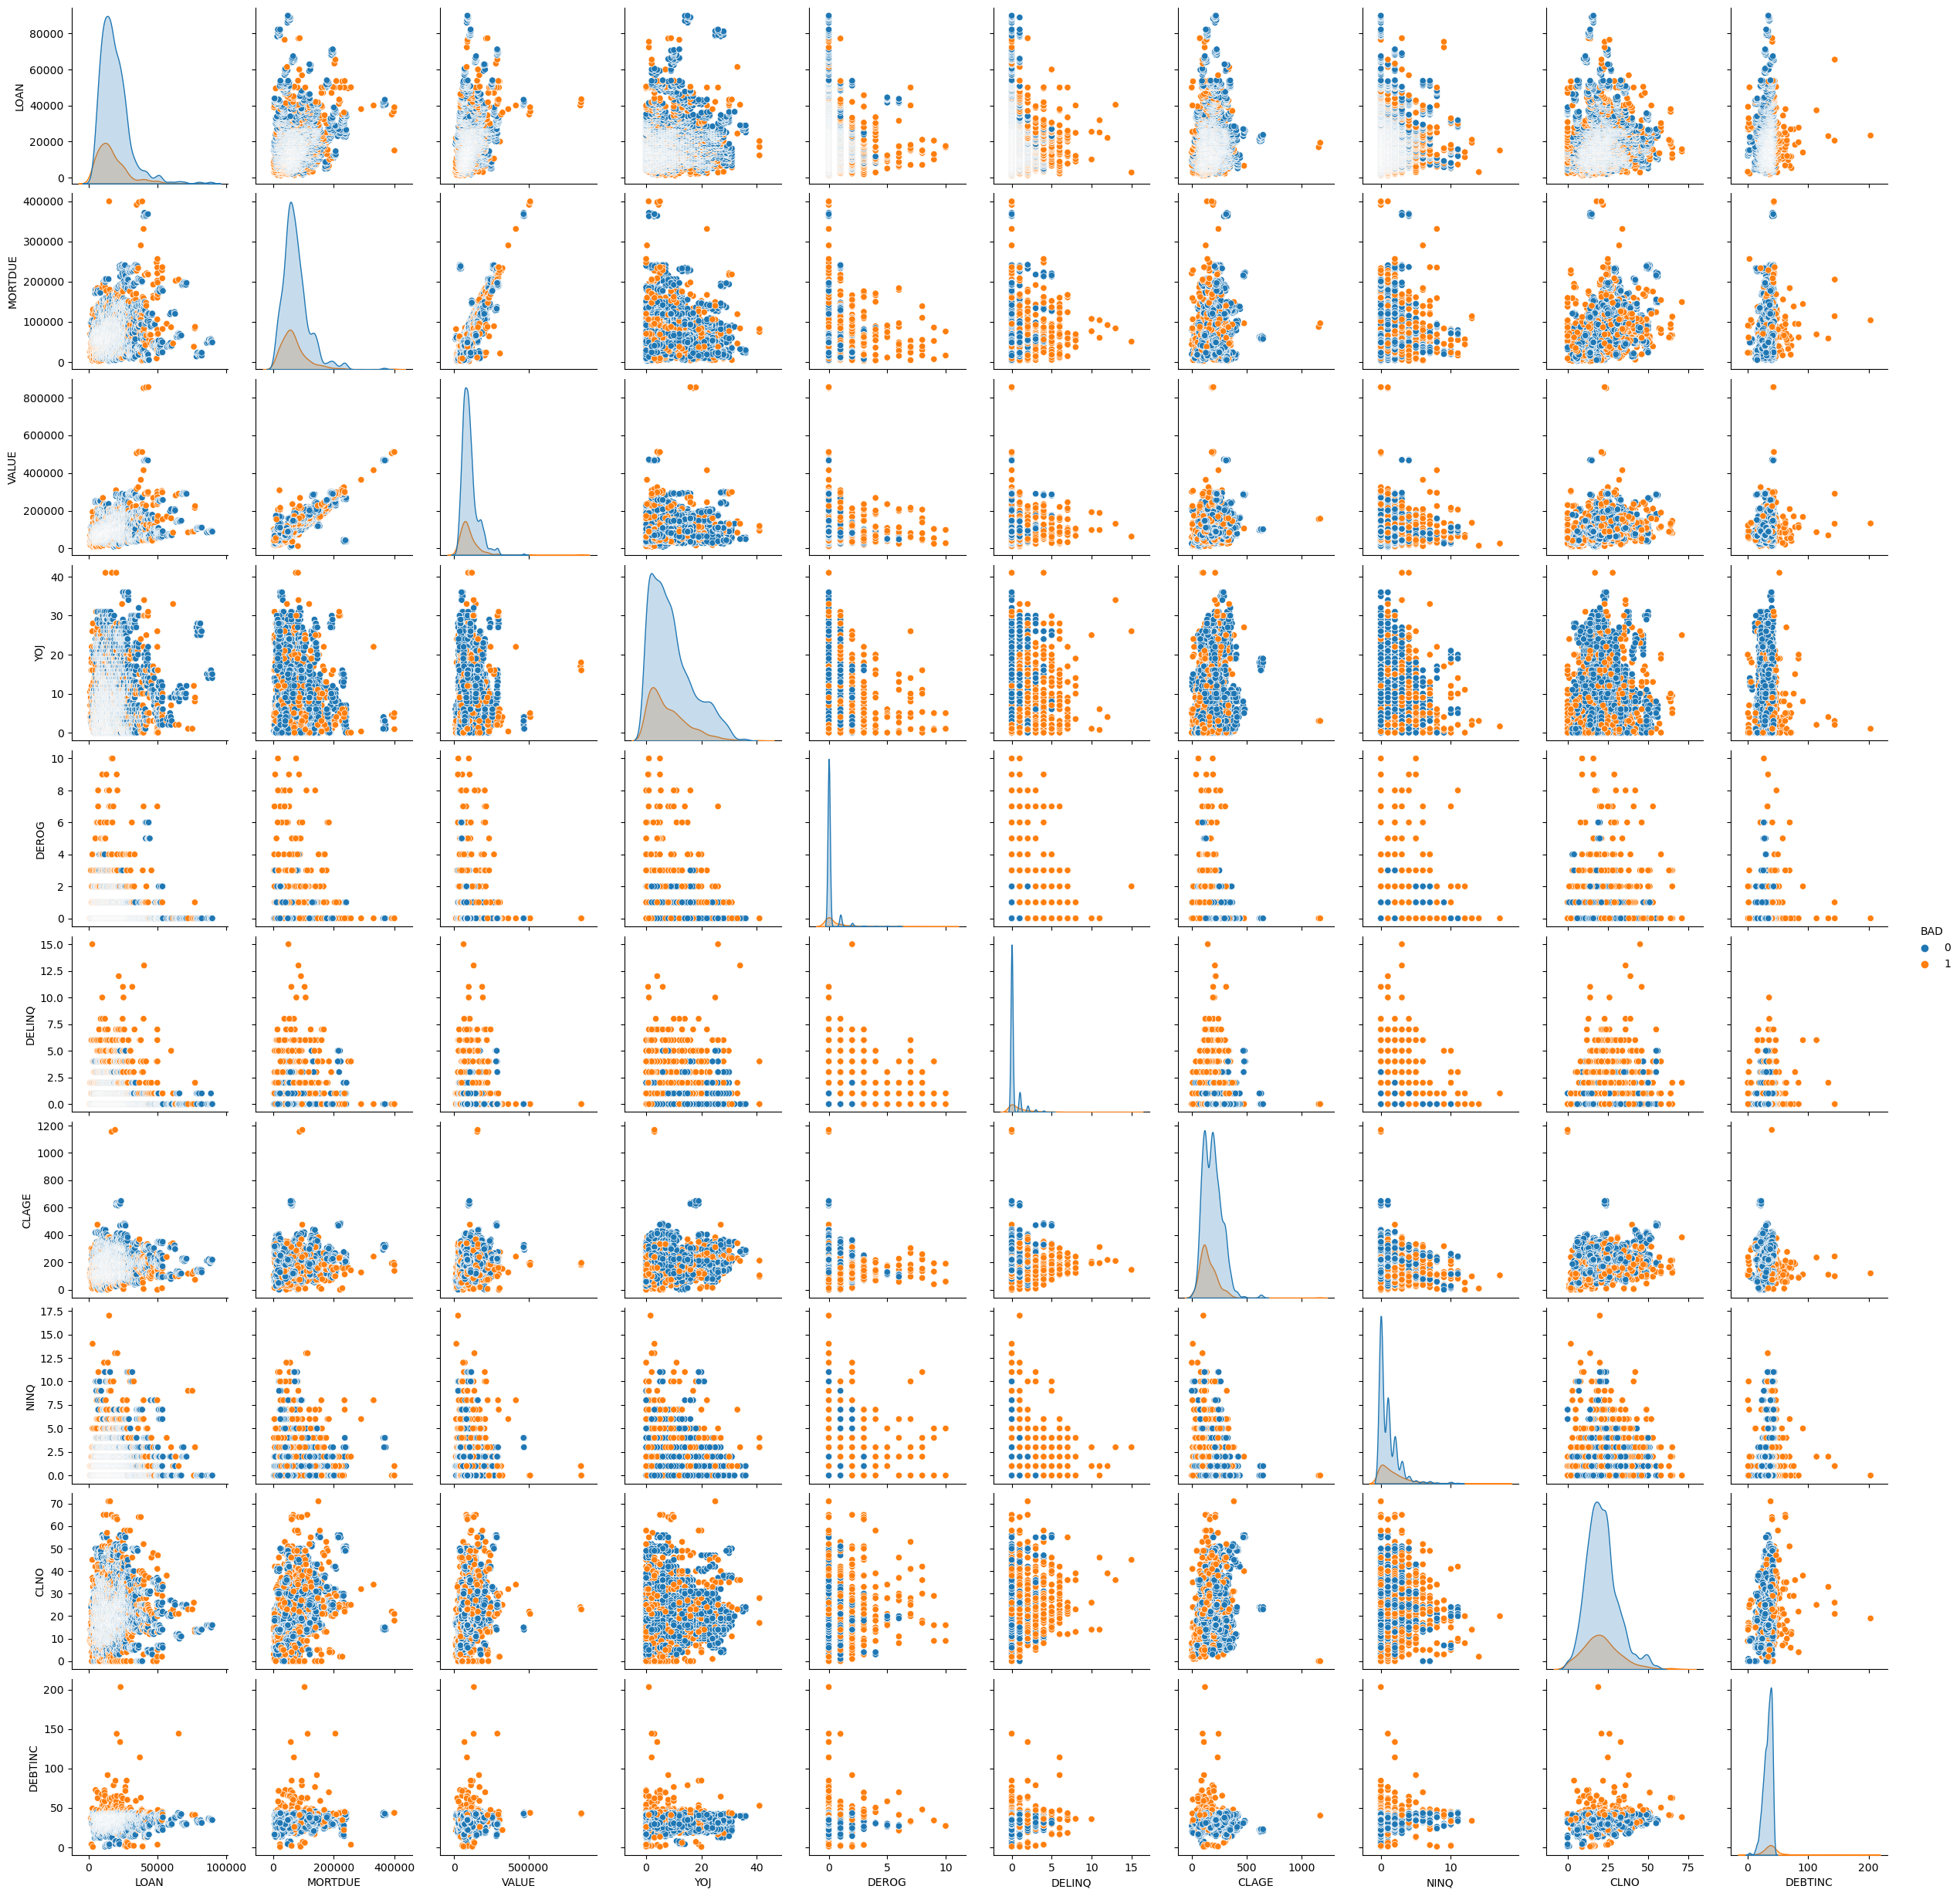

In [504]:
# building pairplot for the hue BAD
sns.pairplot(df, hue='BAD')

# Data Cleaning

In [505]:
# Treating outliers

# Define the columns with numerical data
numerical_cols = ['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']

# Calculate the IQR for each numerical column
Q1 = df[numerical_cols].quantile(0.25)
Q3 = df[numerical_cols].quantile(0.75)
IQR = Q3 - Q1

# Define a function to identify outliers using IQR
def identify_outliers(column):
    lower_bound = Q1[column] - 1.5 * IQR[column]
    upper_bound = Q3[column] + 1.5 * IQR[column]
    outliers = (df[column] < lower_bound) | (df[column] > upper_bound)
    return outliers

# Identify outliers in each numerical column
outliers = pd.DataFrame()
for col in numerical_cols:
    outliers[col] = identify_outliers(col)

# Deal with outliers (replace with median)
for col in numerical_cols:
    median = df[col].median()
    df.loc[outliers[col], col] = median

# Now, outliers have been replaced with median values


In [506]:
df

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5955,0,16300,57264.0,90185.0,DebtCon,Other,16.0,0.0,0.0,221.808718,0.0,16.0,36.112347
5956,0,16300,54576.0,92937.0,DebtCon,Other,16.0,0.0,0.0,208.692070,0.0,15.0,35.859971
5957,0,16300,54045.0,92924.0,DebtCon,Other,15.0,0.0,0.0,212.279697,0.0,15.0,35.556590
5958,0,16300,50370.0,91861.0,DebtCon,Other,14.0,0.0,0.0,213.892709,0.0,16.0,34.340882


In [507]:
df.describe()

,BAD,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
count,5960.000000,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000
mean,0.199497,16965.184564,67511.856707,92452.592517,8.522195,0.254570,0.449442,176.700229,0.963486,20.174102,33.797808
std,0.399656,7793.501256,32224.782925,37824.413083,7.002767,0.846047,1.127266,77.750720,1.171301,8.393589,6.572966
min,0.000000,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.370986
25%,0.000000,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.413550
50%,0.000000,16300.000000,65018.000000,89233.250000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262
75%,0.000000,21900.000000,85352.750000,112136.750000,12.600000,0.000000,0.000000,228.920320,2.000000,25.000000,38.910151
max,1.000000,41600.000000,159000.000000,200339.000000,28.000000,10.000000,15.000000,405.867848,5.000000,42.000000,53.584883


In [508]:
# Dealing with null values
df.isnull().sum()

BAD           0
LOAN          0
MORTDUE     518
VALUE       112
REASON      252
JOB         279
YOJ         515
DEROG       708
DELINQ      580
CLAGE       308
NINQ        510
CLNO        222
DEBTINC    1267
dtype: int64

In [509]:
# Fill null values in each column with its mean

columns_to_fill = ['MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']

for column in columns_to_fill:
    df[column] = df[column].fillna(df[column].mean())

# For categorical variables like 'REASON' and 'JOB', filling them  with the mode

df['REASON'] = df['REASON'].fillna(df['REASON'].mode()[0])
df['JOB'] = df['JOB'].fillna(df['JOB'].mode()[0])

In [510]:
df.isnull().sum()

BAD        0
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

# Encoding

In [511]:
reason = pd.get_dummies(df['REASON'], dtype = int)
reason

,DebtCon,HomeImp
0,0,1
1,0,1
2,0,1
3,1,0
4,0,1
...,...,...
5955,1,0
5956,1,0
5957,1,0
5958,1,0


In [512]:
df = pd.concat([df, reason], axis = 1)

In [513]:
df.drop("REASON", axis = 1, inplace = True)

In [514]:
df.head(3)

,BAD,LOAN,MORTDUE,VALUE,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,DebtCon,HomeImp
0,1,1100,25860.0,39025.0,Other,10.5,0.0,0.0,94.366667,1.0,9.0,33.797808,0,1
1,1,1300,70053.0,68400.0,Other,7.0,0.0,2.0,121.833333,0.0,14.0,33.797808,0,1
2,1,1500,13500.0,16700.0,Other,4.0,0.0,0.0,149.466667,1.0,10.0,33.797808,0,1


In [515]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['JOB'] = le.fit_transform(df['JOB'])
df.sample(n=3)

,BAD,LOAN,MORTDUE,VALUE,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,DebtCon,HomeImp
3901,0,20400,52109.0,100316.0,1,0.000000,0.0,4.0,166.938200,0.0,20.0,35.526228,1,0
2951,1,16200,71530.0,88569.0,0,14.000000,0.0,0.0,176.700229,0.0,1.0,35.886710,1,0
5569,0,36200,36974.0,54452.0,2,8.522195,0.0,0.0,176.700229,1.0,0.0,31.164354,1,0


In [516]:
df['BAD'].value_counts()

BAD
0    4771
1    1189
Name: count, dtype: int64

In [517]:
df.corr()['BAD'].abs()

BAD        1.000000
LOAN       0.109027
MORTDUE    0.080948
VALUE      0.083251
JOB        0.022775
YOJ        0.057878
DEROG      0.264068
DELINQ     0.341472
CLAGE      0.175972
NINQ       0.137462
CLNO       0.030325
DEBTINC    0.084550
DebtCon    0.037517
HomeImp    0.037517
Name: BAD, dtype: float64

# Separating the  target and feature and variable

In [518]:
x = df.drop('BAD', axis = 1)
y = df['BAD']

In [519]:
x.head(3)

,LOAN,MORTDUE,VALUE,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,DebtCon,HomeImp
0,1100,25860.0,39025.0,2,10.5,0.0,0.0,94.366667,1.0,9.0,33.797808,0,1
1,1300,70053.0,68400.0,2,7.0,0.0,2.0,121.833333,0.0,14.0,33.797808,0,1
2,1500,13500.0,16700.0,2,4.0,0.0,0.0,149.466667,1.0,10.0,33.797808,0,1


In [520]:
y.head()

0    1
1    1
2    1
3    1
4    0
Name: BAD, dtype: int64

# Scaling

In [521]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_scaler = sc.fit_transform(x)
x_scaler

array([[-2.03586491e+00, -1.35278298e+00, -1.42610003e+00, ...,
         1.21835241e-15, -1.53242116e+00,  1.53242116e+00],
       [-2.01020035e+00,  8.25321049e-02, -6.42016632e-01, ...,
         1.21835241e-15, -1.53242116e+00,  1.53242116e+00],
       [-1.98453579e+00, -1.75421521e+00, -2.02200342e+00, ...,
         1.21835241e-15, -1.53242116e+00,  1.53242116e+00],
       ...,
       [-8.53583458e-02, -4.37381093e-01,  1.25829032e-02, ...,
         3.01574598e-01,  6.52562120e-01, -6.52562120e-01],
       [-8.53583458e-02, -5.56738977e-01, -1.57909063e-02, ...,
         9.31197304e-02,  6.52562120e-01, -6.52562120e-01],
       [-8.53583458e-02, -6.07372702e-01, -9.39189784e-02, ...,
         1.32666521e-01,  6.52562120e-01, -6.52562120e-01]])

In [522]:
x_scale = pd.DataFrame(x_scaler, columns = [x.columns])
x_scale.head()

,LOAN,MORTDUE,VALUE,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,DebtCon,HomeImp
0,-2.035865,-1.352783,-1.426100e+00,0.061433,2.955139e-01,-0.320564,-4.196817e-01,-1.087509,0.032603,-1.356893,1.218352e-15,-1.532421,1.532421
1,-2.010200,0.082532,-6.420166e-01,0.061433,-2.274388e-01,-0.320564,1.447884e+00,-0.724714,-0.860284,-0.749733,1.218352e-15,-1.532421,1.532421
2,-1.984536,-1.754215,-2.022003e+00,0.061433,-6.756840e-01,-0.320564,-4.196817e-01,-0.359717,0.032603,-1.235461,1.218352e-15,-1.532421,1.532421
3,-1.984536,0.000000,-3.884226e-16,0.061433,2.654145e-16,0.000000,-5.183537e-17,0.000000,0.000000,0.000000,1.218352e-15,0.652562,-0.652562
4,-1.958871,0.983708,5.217633e-01,-0.833779,-8.250991e-01,-0.320564,-4.196817e-01,-1.101158,-0.860284,-0.749733,1.218352e-15,-1.532421,1.532421


# Splitting the data

In [523]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scale,y, train_size = 0.7, shuffle = True, random_state = 41)

In [524]:
print(f"The shape of our x_train is {x_train.shape}")
print(f"The shape of our x_test is {x_test.shape}")
print(f"The shape of our y_train is {y_train.shape}")
print(f"The shape of our y_test is {y_test.shape}")

The shape of our x_train is (4172, 13)
The shape of our x_test is (1788, 13)
The shape of our y_train is (4172,)
The shape of our y_test is (1788,)


# Model Training

In [525]:
from sklearn.ensemble import RandomForestClassifier 
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [526]:
model.score(x_train, y_train).round(2)

1.0

# Testing

91.0
[[1375   37]
 [ 130  246]]


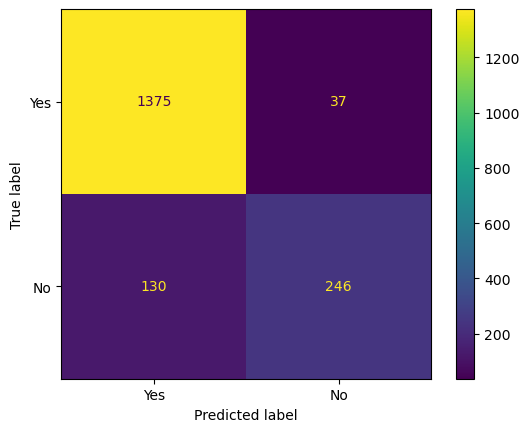

In [527]:
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
model.predict(x_test)
print(accuracy_score(y_test, model.predict(x_test)).round(2) * 100)
print(confusion_matrix(y_test, model.predict(x_test)))
label = ["Yes", "No"]
ConfusionMatrixDisplay(confusion_matrix(y_test, model.predict(x_test)), display_labels = label).plot()

In [528]:
# True Positives (TP): 1375 - These are instances where the model correctly predicted a loan as "bad".
# False Positives (FP): 37- These are instances where the model incorrectly predicted a loan as "bad" when it's not.
# False Negatives (FN): 130 - These are instances where the model incorrectly predicted a loan as not "bad" when it actually is.
# True Negatives (TN): 246 - These are instances where the model correctly predicted a loan as not "bad".

# Model Evaluation

In [529]:
# creating metric function
from sklearn.metrics import classification_report
def metrics_score(actual, predicted):
    print(classification_report(actual, predicted))
    cm = confusion_matrix(actual, predicted)
    plt.figure(figsize=(8,5))
    sns.heatmap(cm, annot=True,  fmt='.2f', xticklabels=['Not Eligible', 'Eligible'], yticklabels=['Not Eligible', 'Eligible'])
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.show()  

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3359
           1       1.00      1.00      1.00       813

    accuracy                           1.00      4172
   macro avg       1.00      1.00      1.00      4172
weighted avg       1.00      1.00      1.00      4172



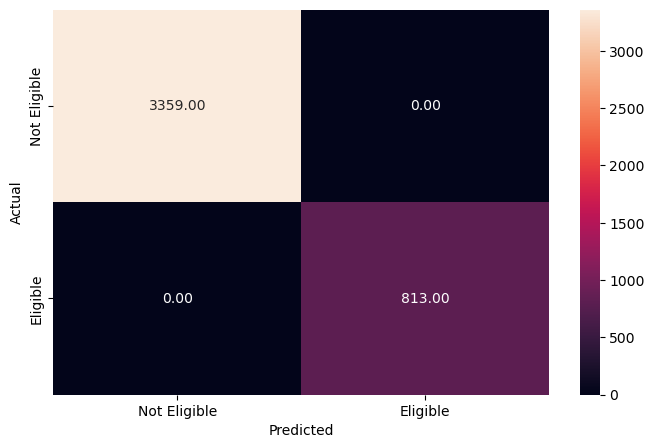

In [530]:
# checking the performance on the train set
# precision : reveals the proportion of loans predicted as "bad" that are actually "bad".
metrics_score(y_train, model.predict(x_train))

              precision    recall  f1-score   support

           0       0.91      0.97      0.94      1412
           1       0.87      0.65      0.75       376

    accuracy                           0.91      1788
   macro avg       0.89      0.81      0.84      1788
weighted avg       0.90      0.91      0.90      1788



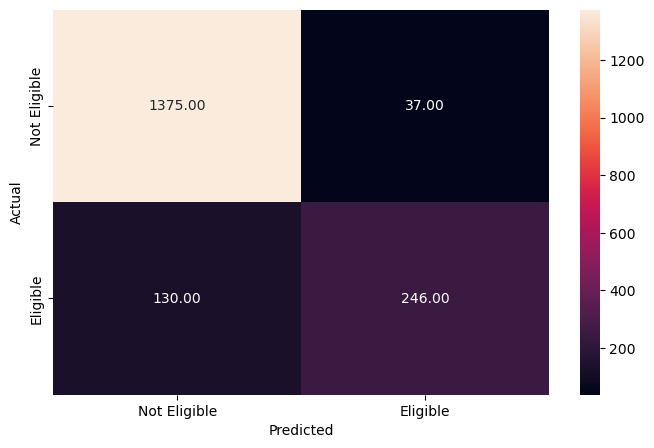

In [531]:
metrics_score(y_test, model.predict(x_test))

# Prediction

In [534]:
df.head(3)

,BAD,LOAN,MORTDUE,VALUE,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,DebtCon,HomeImp
0,1,1100,25860.0,39025.0,2,10.5,0.0,0.0,94.366667,1.0,9.0,33.797808,0,1
1,1,1300,70053.0,68400.0,2,7.0,0.0,2.0,121.833333,0.0,14.0,33.797808,0,1
2,1,1500,13500.0,16700.0,2,4.0,0.0,0.0,149.466667,1.0,10.0,33.797808,0,1


In [535]:
input_data = (1100, 25860.0, 39025.0, 2, 10.5, 0.0, 0.0, 94.366667, 1.0, 9.0, 33.797808, 0, 1)

# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we predict for one datapoint
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
    print("The Loan is repaid")

else:
    print("The Loan is defaulted")

[1]
The Loan is defaulted


In [536]:
import pickle as pk
pk.dump(model, open('predict_data.pkl', 'wb'))

In [537]:
loaded_model  = pk.load(open("predict_data.pkl", 'rb'))

In [539]:
input_data = (1100, 25860.0, 39025.0, 2, 10.5, 0.0, 0.0, 94.366667, 1.0, 9.0, 33.797808, 0, 1)

# change the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we predict for one datapoint
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = loaded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
    print("The Loan is repaid")

else:
    print("The Loan is defaulted")

[1]
The Loan is defaulted
